In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/workspaces/Final-Year-Project/Cleaned Data/BalancedData.csv')

# Load the additional datasets
ghb_df = pd.read_sas('/workspaces/Final-Year-Project/Data/2023/GHB_L (1).xpt')
glu_df = pd.read_sas('/workspaces/Final-Year-Project/Data/2023/GLU_L (1).xpt')

# Select only the necessary columns
ghb_df = ghb_df[['SEQN', 'LBXGH']]  # Select 'seqn' and 'LBXGH' from GHB dataset
glu_df = glu_df[['SEQN', 'LBXGLU']]  # Select 'seqn' and 'LBXGLU' from GLU dataset

# Merge the datasets on 'seqn'
df = df.merge(ghb_df, on='SEQN', how='left')  # Join with GHB data
df = df.merge(glu_df, on='SEQN', how='left')  # Join with GLU data

# Display the first 5 rows of the updated data
df.head()


,SEQN,IMQ011,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,...,BMXARMC,BMXWAIST,RXQ033,INDFMMPC,INQ300,HOD051,HEQ010,Diabetes Status,LBXGH,LBXGLU
0,132708.0,1.0,12.0,2.0,1.0,11.0,1.0,1.0,1.0,1.0,...,36.2,118.2,1.0,2.0,2.0,5.0,2.0,0,NaN,NaN
1,138050.0,3.0,12.0,2.0,2.0,75.0,3.0,3.0,2.0,1.0,...,44.4,129.5,1.0,1.0,2.0,4.0,2.0,1,6.1,133.0
2,134168.0,1.0,12.0,2.0,1.0,36.0,3.0,3.0,1.0,1.0,...,33.3,95.8,1.0,3.0,1.0,6.0,2.0,0,5.3,NaN
3,135204.0,1.0,12.0,2.0,1.0,60.0,3.0,3.0,1.0,1.0,...,39.9,137.8,1.0,3.0,1.0,8.0,2.0,0,5.4,98.0
4,134411.0,1.0,12.0,2.0,1.0,74.0,5.0,7.0,2.0,1.0,...,26.4,76.7,1.0,3.0,1.0,6.0,2.0,1,5.6,113.0


**Selected Features**

IMQ011 = Recieved Hepatitis Vaccine

RIDAGEYR = Age

DMDHHSIZ = Total Number Of People In Household

HUQ010 = Self Percieved Health

AUQ054 = Self Percieved Hearing

OHQ845 = Self Percieved Oral Health

BMXWT = Weight KG

BMXHT = Height CM

BMXBMI = BMI

BMXARML = Arm Length CM

BMXARMC = Arm Circumfrence CM

BMXWAIST = Waist Circumference CM

RXQ033 = Taken prescription medication in last 30 days 

In [3]:
df.value_counts('Diabetes Status')

Diabetes Status
0    1816
1    1816
Name: count, dtype: int64

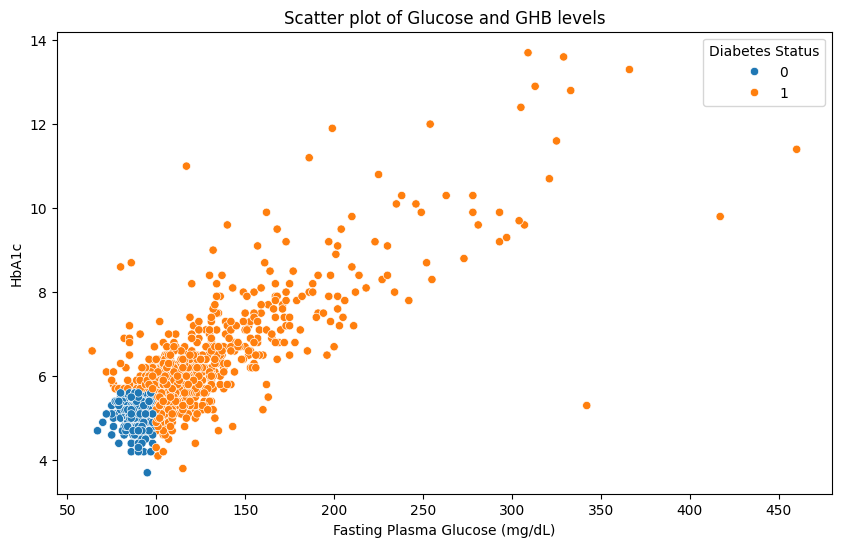

In [4]:
df_glucose_hba1c = df.dropna()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_glucose_hba1c, x='LBXGLU', y='LBXGH', hue='Diabetes Status')
plt.title('Scatter plot of Glucose and GHB levels')
plt.xlabel('Fasting Plasma Glucose (mg/dL)')
plt.ylabel('HbA1c')
plt.show()



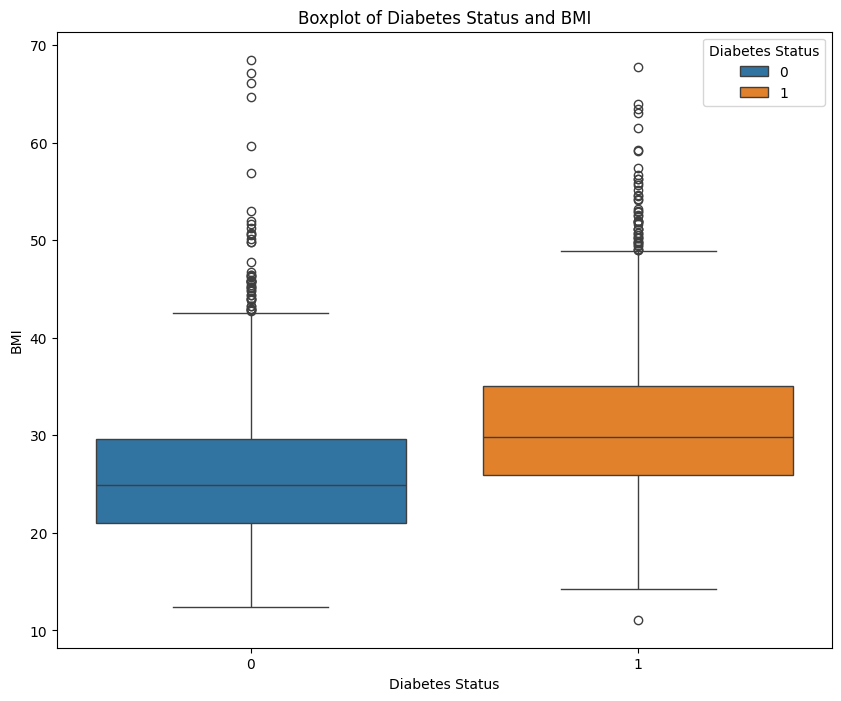

In [5]:
# Boxplot for diabetes status and BMI

plt.figure(figsize=(10, 8))
sns.boxplot(x='Diabetes Status', y='BMXBMI', data=df, hue='Diabetes Status')
plt.title('Boxplot of Diabetes Status and BMI')
plt.ylabel('BMI')
plt.show()



In [6]:
# mean bmi for diabetes status
df.groupby('Diabetes Status')['BMXBMI'].median()


Diabetes Status
0    24.9
1    29.8
Name: BMXBMI, dtype: float64

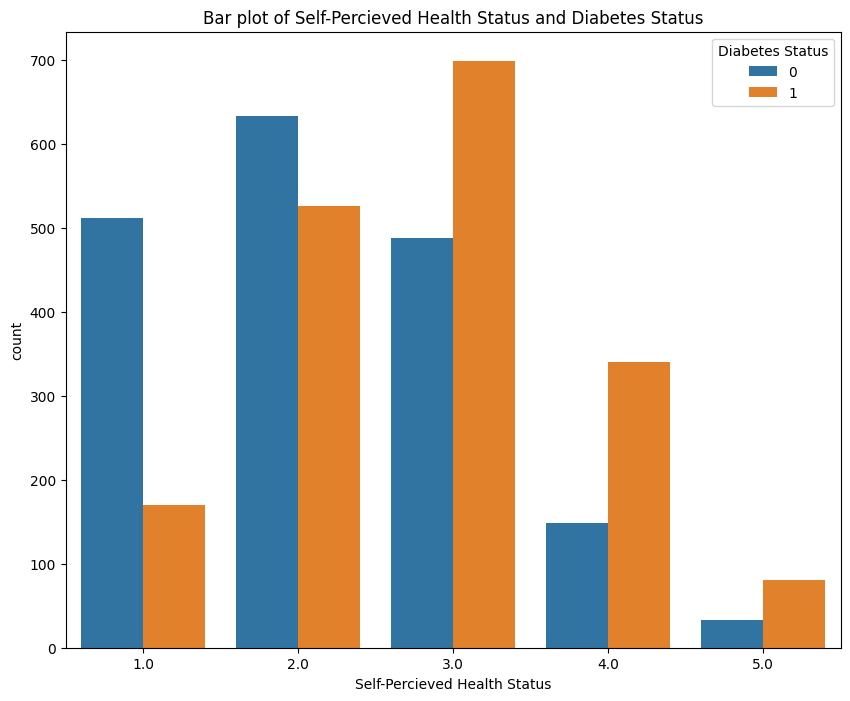

In [9]:
# bar plot of general health status and diabetes status value counts for each health value

plt.figure(figsize=(10, 8))

sns.countplot(x='HUQ010', hue='Diabetes Status', data=df)
plt.title('Bar plot of Self-Percieved Health Status and Diabetes Status')
plt.xlabel('Self-Percieved Health Status')

plt.show()


In [10]:
#percentage of those with positive diabetes status when they have a health status of 3 or more
df[df['HUQ010'] >= 3].value_counts('Diabetes Status', normalize=True)


Diabetes Status
1    0.625698
0    0.374302
Name: proportion, dtype: float64

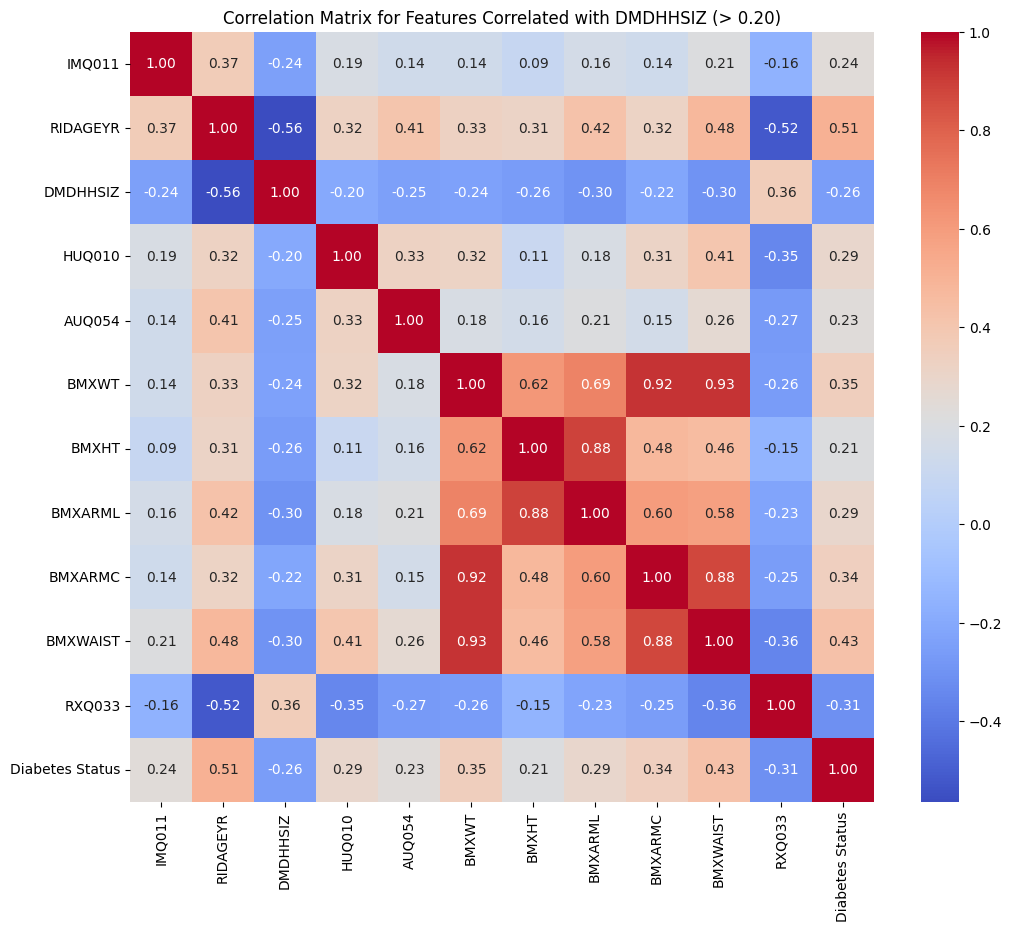

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix for the entire dataframe
df_corr = df.corr()

# Filter correlations for 'DMDHHSIZ' with absolute values above 0.20
corr_filtered = df_corr['DMDHHSIZ'].abs() > 0.20

# Get the columns that pass the filter
columns_to_keep = corr_filtered.index[corr_filtered]

# Subset the dataframe to only keep the selected columns
df_filtered = df[columns_to_keep]

# Compute the correlation matrix for the filtered columns
df_corr_filtered = df_filtered.corr()

# Plot the heatmap of the filtered correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr_filtered, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix for Features Correlated with DMDHHSIZ (> 0.20)')
plt.show()




In [ ]:
# print correlations in descending abs order

df_corr_filtered['DMDHHSIZ'].sort_values(ascending=False)


DMDHHSIZ           1.000000
RXQ033             0.360164
HUQ010            -0.201463
BMXARMC           -0.217070
BMXWT             -0.238428
IMQ011            -0.241234
AUQ054            -0.246079
Diabetes Status   -0.258592
BMXHT             -0.264409
BMXARML           -0.295742
BMXWAIST          -0.300036
RIDAGEYR          -0.564229
Name: DMDHHSIZ, dtype: float64

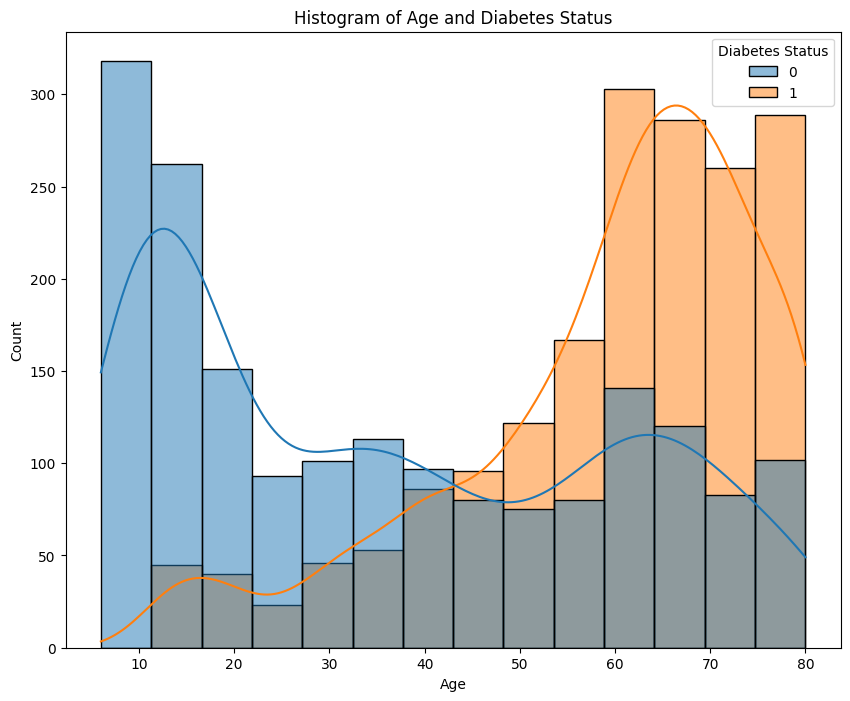

In [ ]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x='RIDAGEYR', hue='Diabetes Status', kde=True)
plt.title('Histogram of Age and Diabetes Status')
plt.xlabel('Age')
plt.show()

In [ ]:
# percentage of age (RIDAGEYR) 60 and above with diabetes

age_60_above = df[df['RIDAGEYR'] >= 60]
age_60_above_diabetes = age_60_above[age_60_above['Diabetes Status'] == 1]
percentage = (age_60_above_diabetes.shape[0] / age_60_above.shape[0]) * 100
print(f'Percentage of individuals aged 60 and above with diabetes: {percentage:.2f}%')


Percentage of individuals aged 60 and above with diabetes: 71.98%


In [ ]:
# percentage of age (RIDAGEYR) 30 and below without diabetes

age_30_below = df[df['RIDAGEYR'] <= 30]
age_30_below_diabetes = age_30_below[age_30_below['Diabetes Status'] == 0]
percentage = (age_30_below_diabetes.shape[0] / age_30_below.shape[0]) * 100
print(f'Percentage of individuals aged 30 and below without diabetes: {percentage:.2f}%')

Percentage of individuals aged 30 and below without diabetes: 87.12%


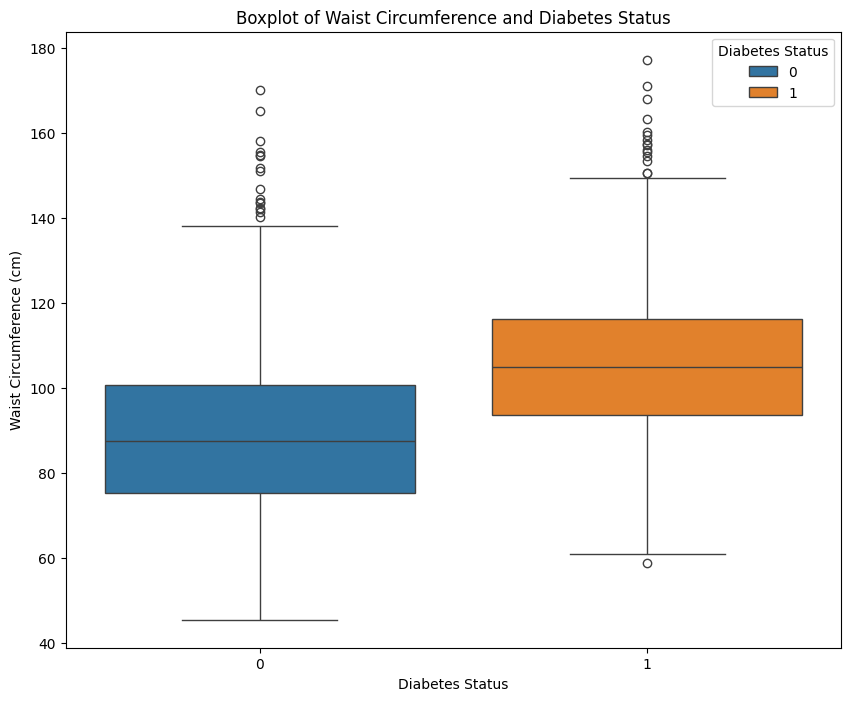

In [ ]:
plt.figure(figsize=(10, 8))

sns.boxplot(data=df, x='Diabetes Status', y='BMXWAIST', hue='Diabetes Status')
plt.title('Boxplot of Waist Circumference and Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Waist Circumference (cm)')

plt.show()


In [ ]:
# median waist circumference for diabetes status

df.groupby('Diabetes Status')['BMXWAIST'].median()

Diabetes Status
0     87.55
1    105.00
Name: BMXWAIST, dtype: float64

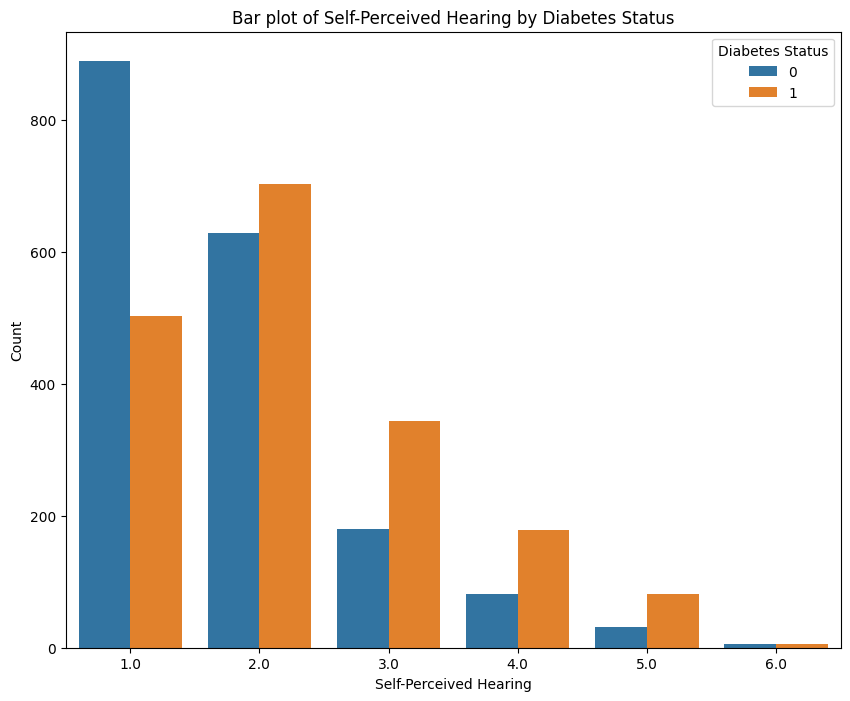

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='AUQ054', hue='Diabetes Status', data=df)
plt.title('Bar plot of Self-Perceived Hearing by Diabetes Status')
plt.xlabel('Self-Perceived Hearing')
plt.ylabel('Count')
plt.show()

In [11]:
#percentage of those with positive diabetes status when they have a self-perceived hearing of 2 or more

df[df['AUQ054'] >= 2].value_counts('Diabetes Status', normalize=True)

Diabetes Status
1    0.586345
0    0.413655
Name: proportion, dtype: float64

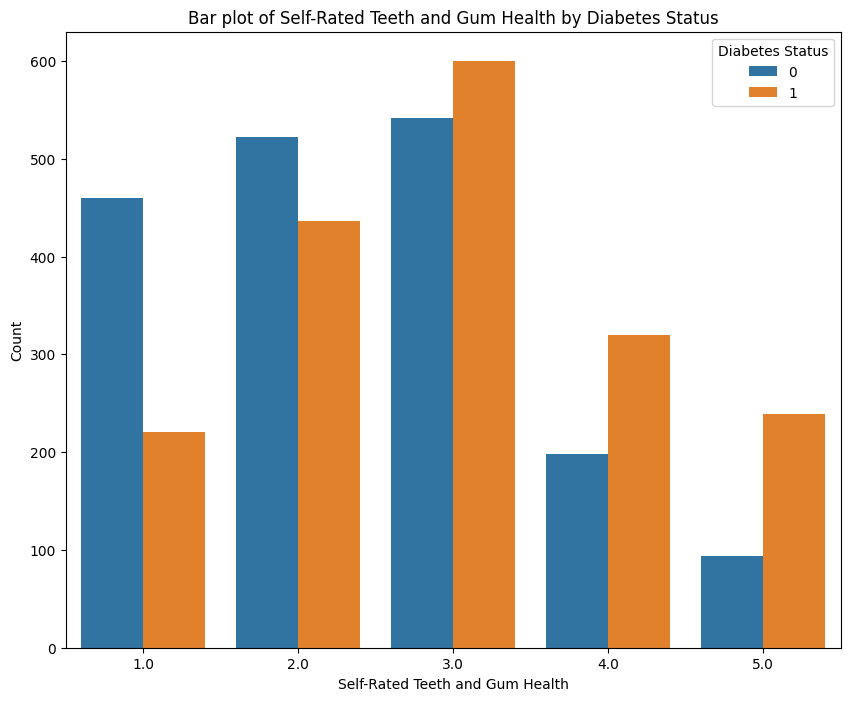

In [12]:
plt.figure(figsize=(10, 8))
sns.countplot(x='OHQ845', hue='Diabetes Status', data=df)
plt.title('Bar plot of Self-Rated Teeth and Gum Health by Diabetes Status')
plt.xlabel('Self-Rated Teeth and Gum Health')
plt.ylabel('Count')
plt.show()

In [13]:
#percentage of those with positive diabetes status when they have a self-rated teeth and gum health of 3 or more

df[df['OHQ845'] >= 3].value_counts('Diabetes Status', normalize=True)

Diabetes Status
1    0.581535
0    0.418465
Name: proportion, dtype: float64